In [7]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np

images_dir = "./output/hdf5_format/"

In [8]:
""" Option 1 - Shapes of the output """

for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    print("-"*5, image, "-"*5)
    image_dir = images_dir + image
    with h5py.File(image_dir, 'r') as file:
        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                print(f"Group: {name}")
            elif isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name} - shape: {obj.shape}, dtype: {obj.dtype}")

        # Traverse and print the structure
        file.visititems(print_structure)
    print("\n")

----- 0.hdf5 -----
Dataset: blender_proc_version - shape: (), dtype: |S5
Dataset: category_id_segmaps - shape: (544, 960), dtype: int64
Dataset: colors - shape: (544, 960, 3), dtype: uint8
Dataset: instance_attribute_maps - shape: (), dtype: |S150
Dataset: instance_segmaps - shape: (544, 960), dtype: int64


----- 1.hdf5 -----
Dataset: blender_proc_version - shape: (), dtype: |S5
Dataset: category_id_segmaps - shape: (544, 960), dtype: int64
Dataset: colors - shape: (544, 960, 3), dtype: uint8
Dataset: instance_attribute_maps - shape: (), dtype: |S98
Dataset: instance_segmaps - shape: (544, 960), dtype: int64


----- 2.hdf5 -----
Dataset: blender_proc_version - shape: (), dtype: |S5
Dataset: category_id_segmaps - shape: (544, 960), dtype: int64
Dataset: colors - shape: (544, 960, 3), dtype: uint8
Dataset: instance_attribute_maps - shape: (), dtype: |S98
Dataset: instance_segmaps - shape: (544, 960), dtype: int64


----- 3.hdf5 -----
Dataset: blender_proc_version - shape: (), dtype: |S5

In [11]:
""" Option 2 - Looking at the contents of the output """

for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    print("-"*5, image, "-"*5)
    image_dir = images_dir + image
    with h5py.File(image_dir, 'r') as file:
        # View the blender_proc_version
        version = file['blender_proc_version'][()]
        print("BlenderProc Version:", version.decode('utf-8'))

        # View a small section of the colors dataset
        colors = file['colors'][:5, :5] # 5x5 sample
        print("Colors dataset sample (5x5 pixels):\n", colors)

        # # View a small section of the depth dataset
        # depth = file['depth'][:5, :5]  # 5x5 sample
        # print("Depth dataset sample (5x5 pixels):\n", depth)

        # # View a small section of the normals dataset
        # normals = file['normals'][:5, :5]
        # print("Normals dataset sample (5x5 pixels):\n", normals)

        segmaps = file['instance_segmaps'][:5, :5]
        print("Instance Segmaps sample (5x5 pixels):\n", segmaps)
    
    print("\n")

----- 0.hdf5 -----
BlenderProc Version: 2.8.0
Colors dataset sample (5x5 pixels):
 [[[17 25 12]
  [17 28 10]
  [19 30 10]
  [18 30 10]
  [19 30  9]]

 [[17 28 10]
  [17 29  9]
  [18 29 10]
  [18 30 10]
  [17 29  9]]

 [[16 28  9]
  [16 27  9]
  [16 28  9]
  [16 28  9]
  [17 28  9]]

 [[15 26  9]
  [15 26  9]
  [16 27  9]
  [16 27  9]
  [16 27  9]]

 [[14 25  8]
  [15 26  9]
  [15 26  9]
  [15 27  9]
  [15 26  8]]]
Instance Segmaps sample (5x5 pixels):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


----- 1.hdf5 -----
BlenderProc Version: 2.8.0
Colors dataset sample (5x5 pixels):
 [[[126  25 123]
  [144   1 144]
  [145   1 146]
  [141   0 145]
  [143   1 146]]

 [[148   0 140]
  [151   0 148]
  [147   1 146]
  [147   1 146]
  [146   0 145]]

 [[141   0 145]
  [143   0 144]
  [144   1 144]
  [143   0 142]
  [145   1 143]]

 [[145   0 144]
  [143   0 142]
  [146   1 145]
  [144   1 144]
  [144   1 144]]

 [[145   0 145]
  [142   0 142]
  [145   1 144]
  [144   1 144]


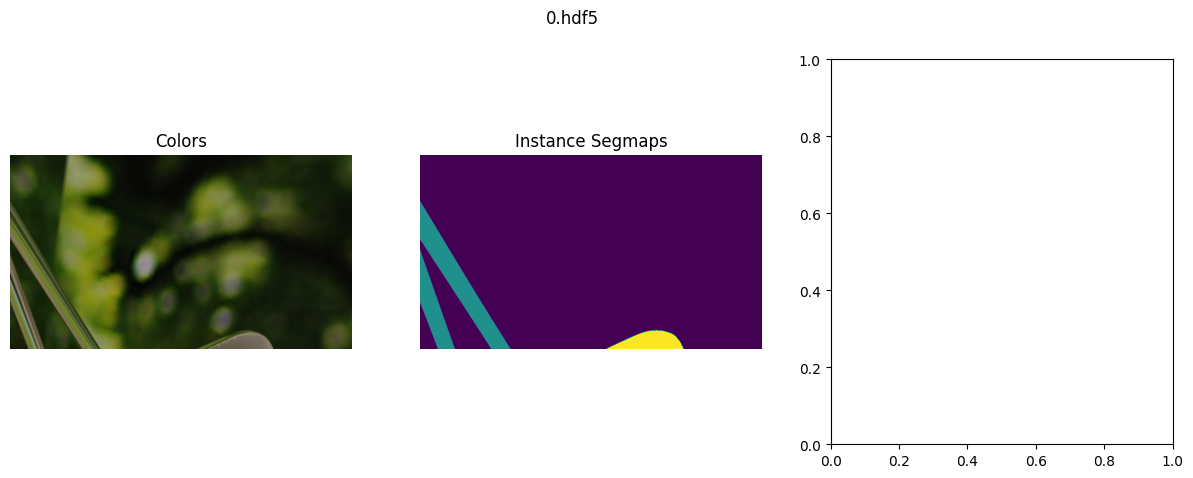

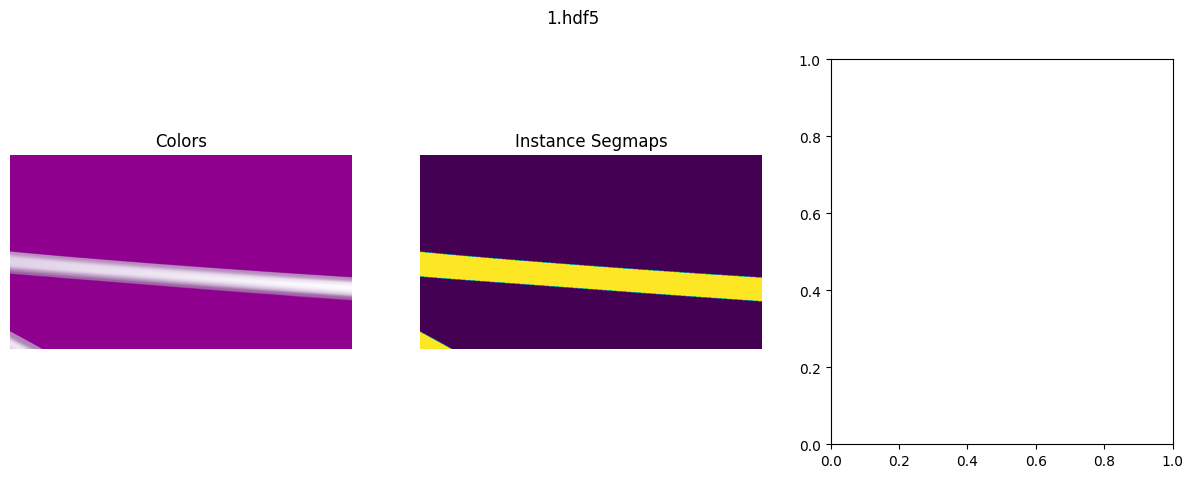

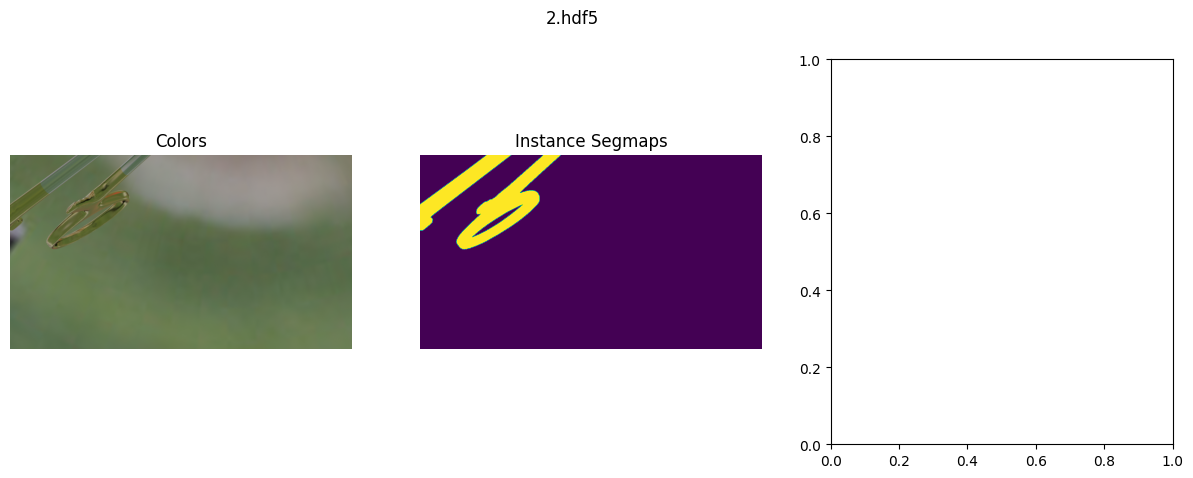

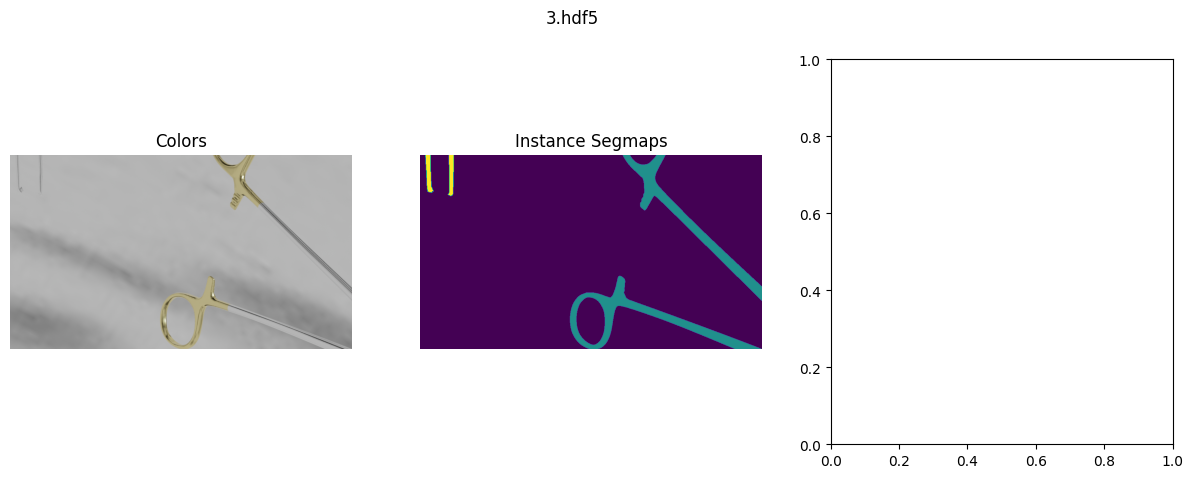

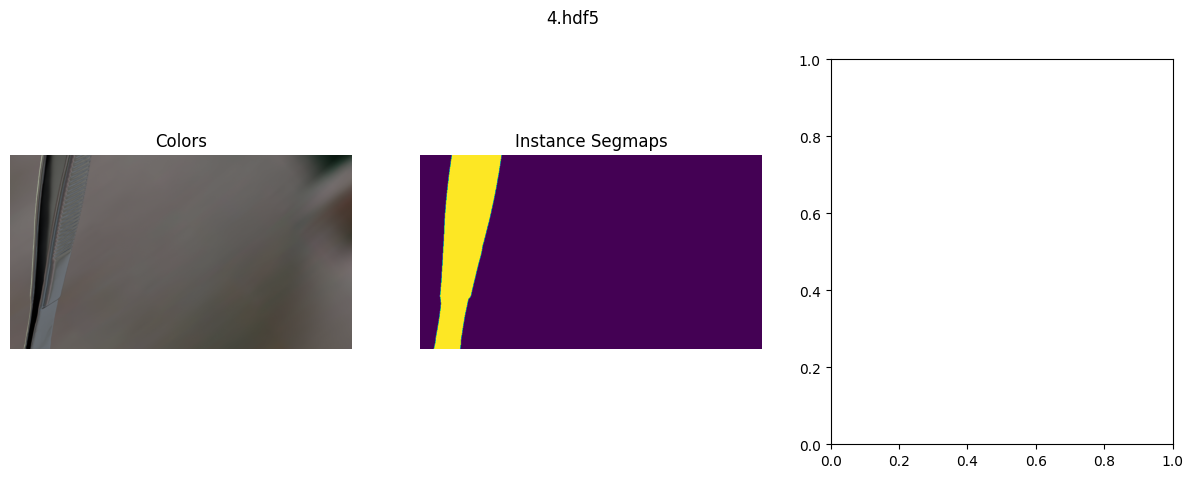

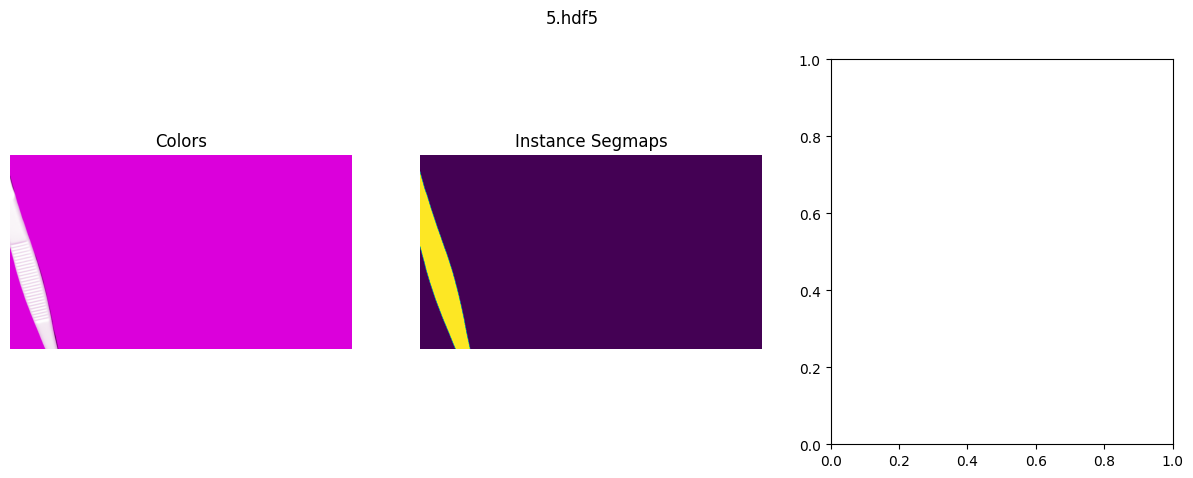

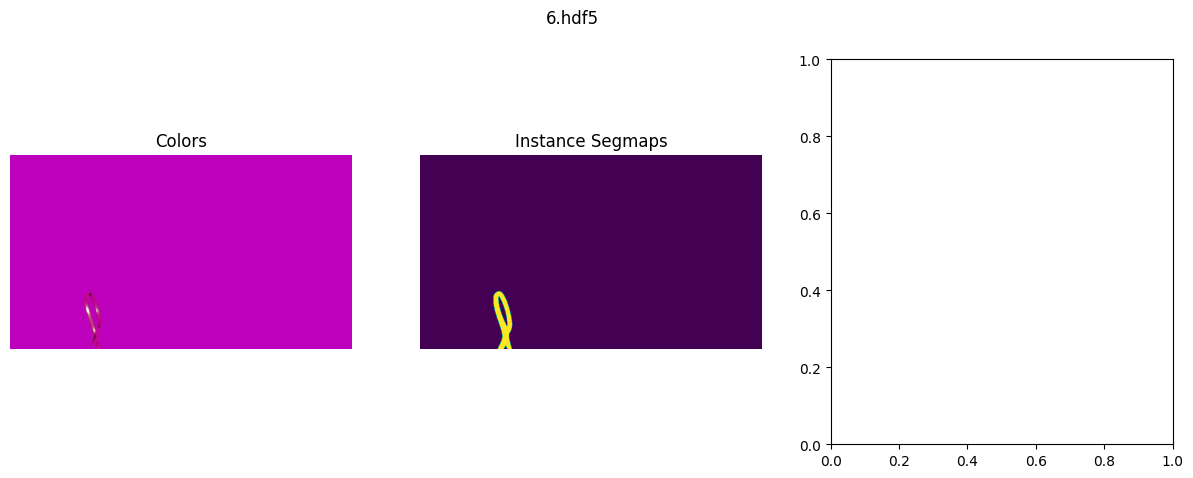

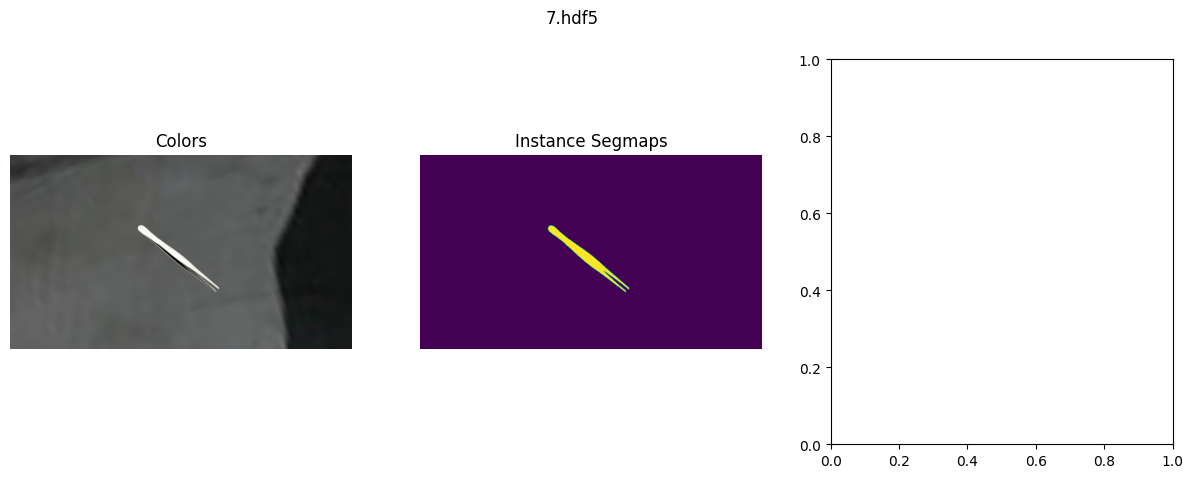

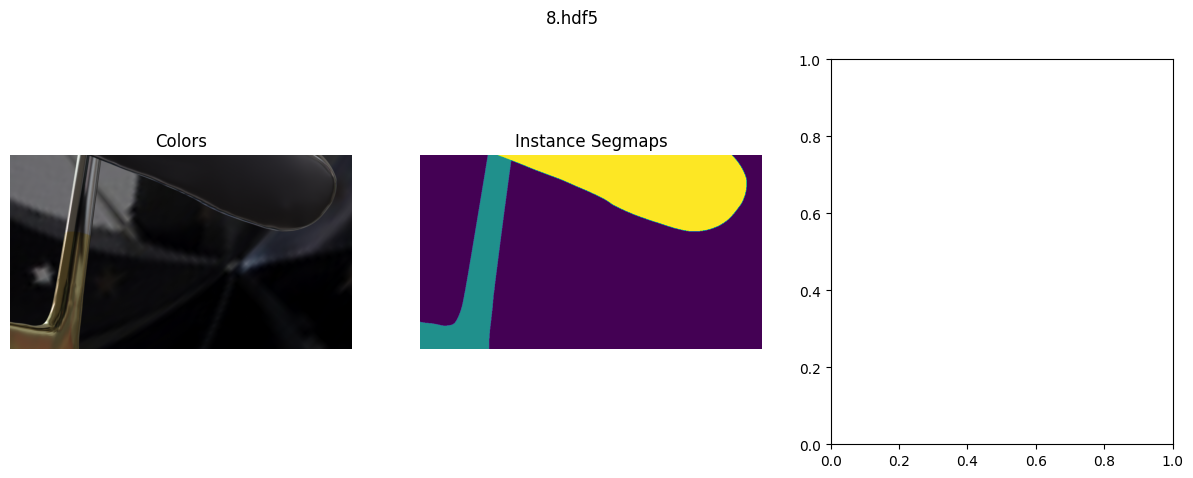

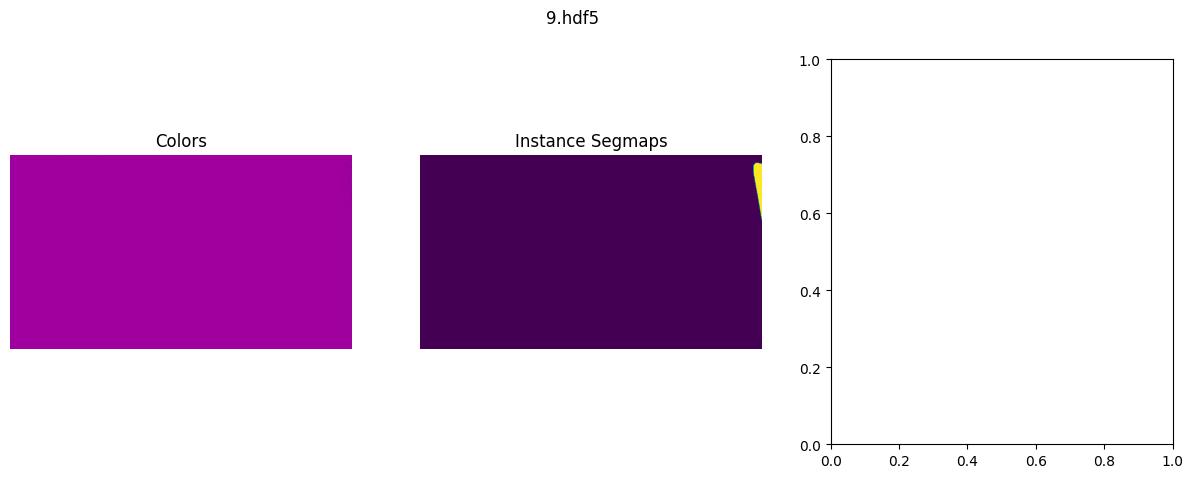

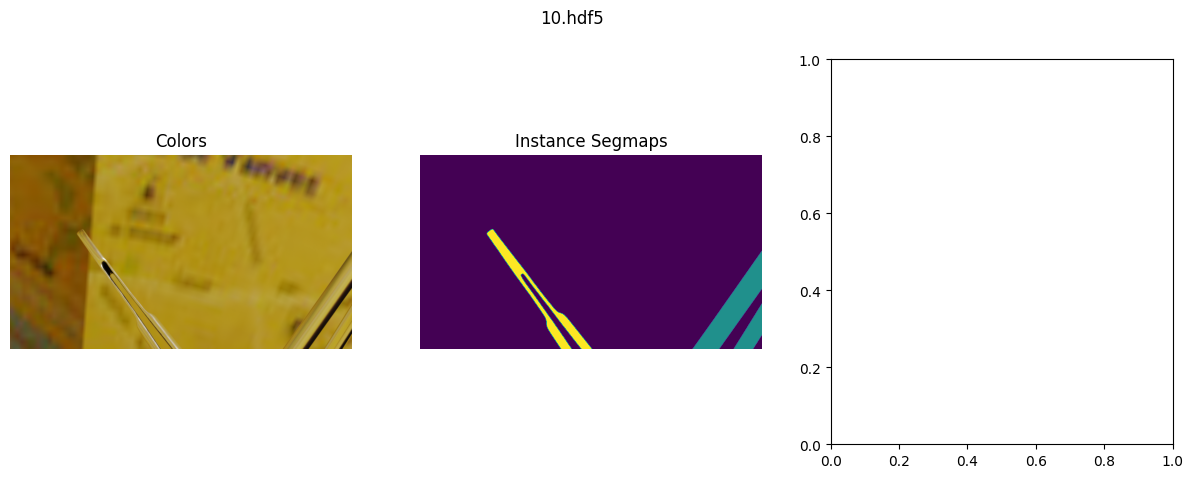

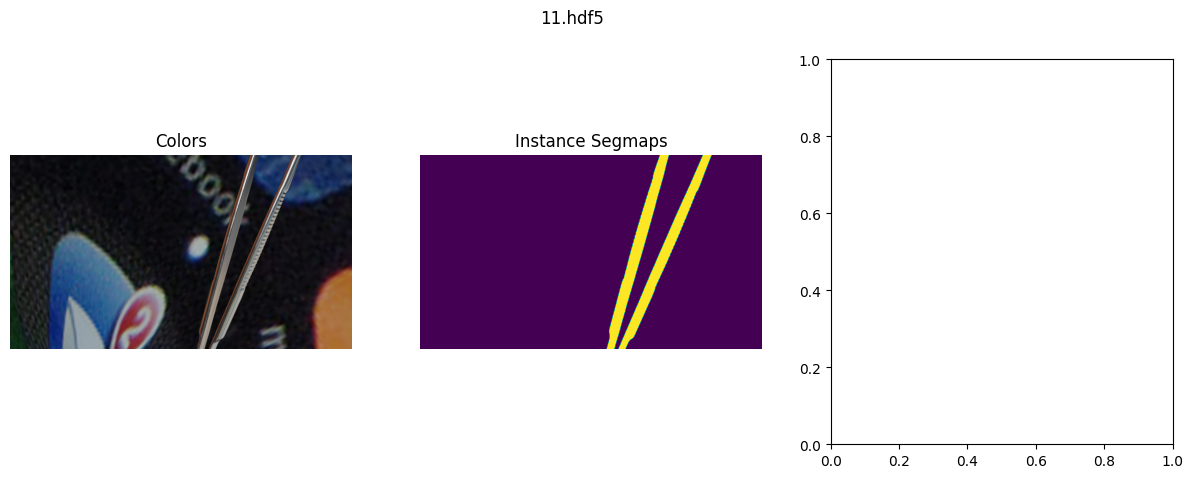

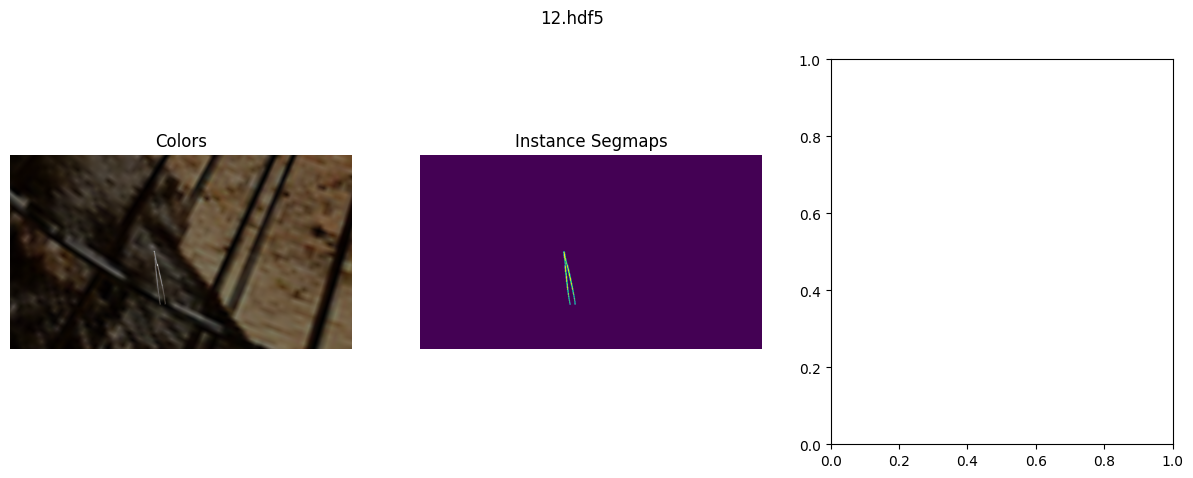

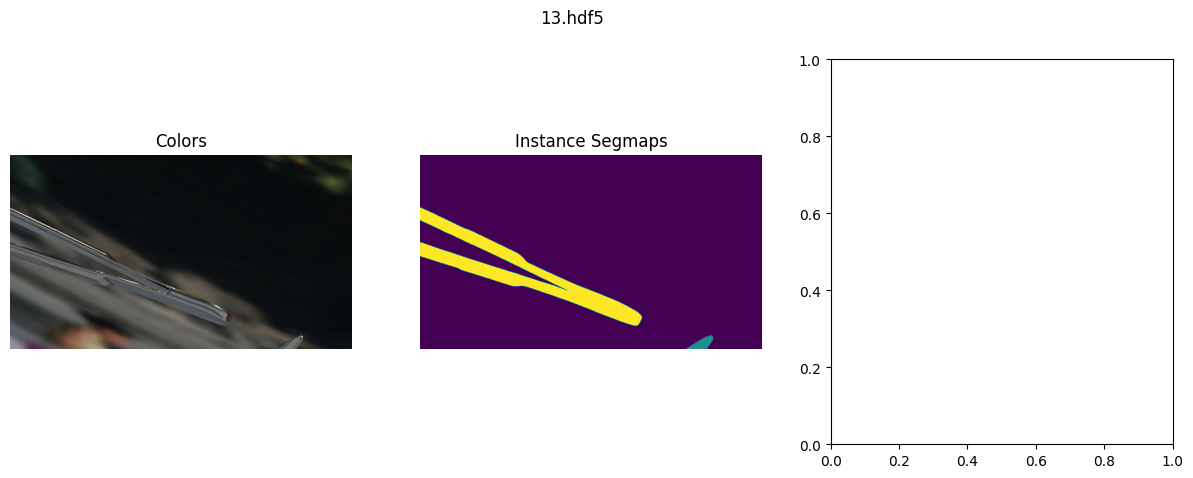

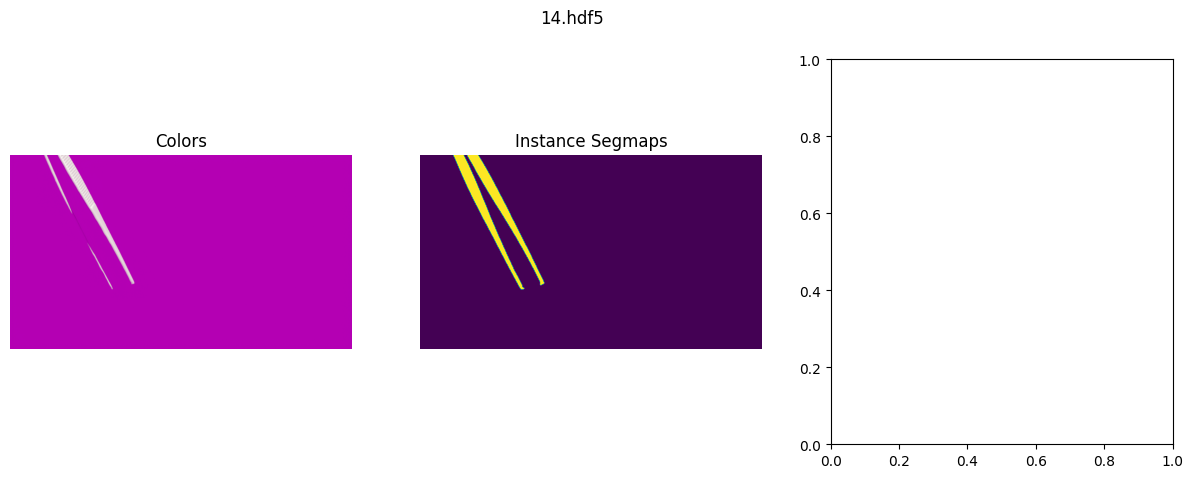

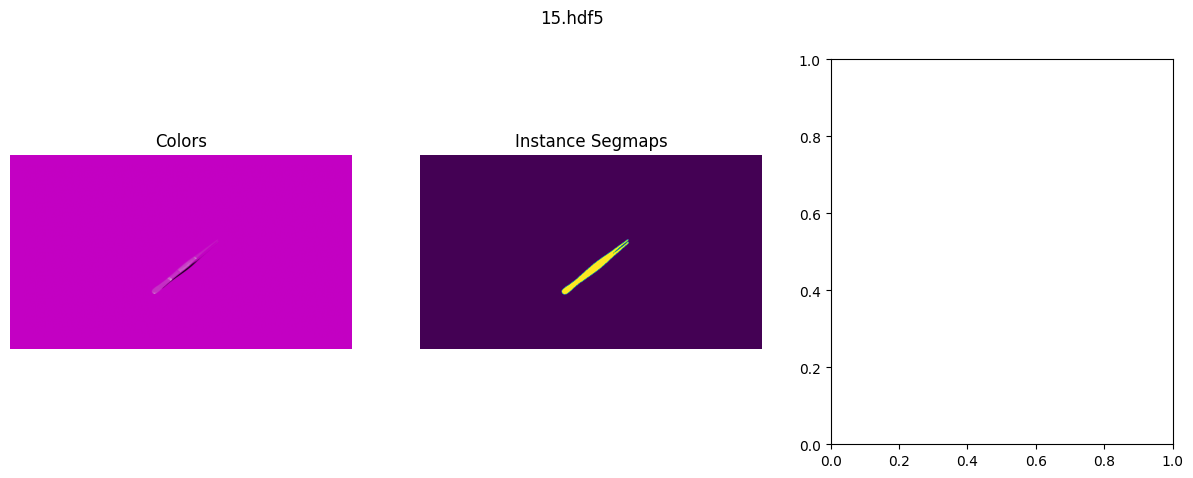

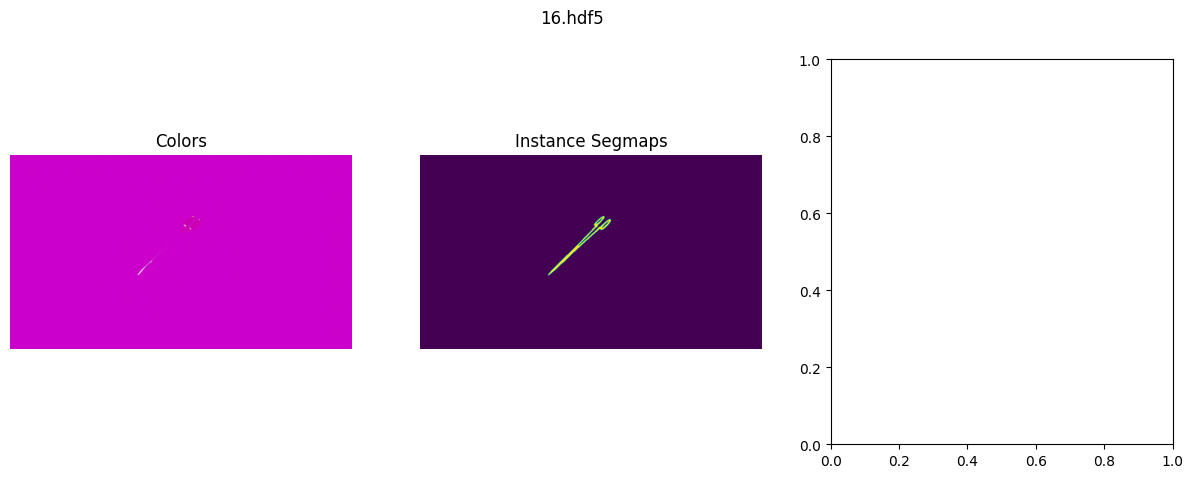

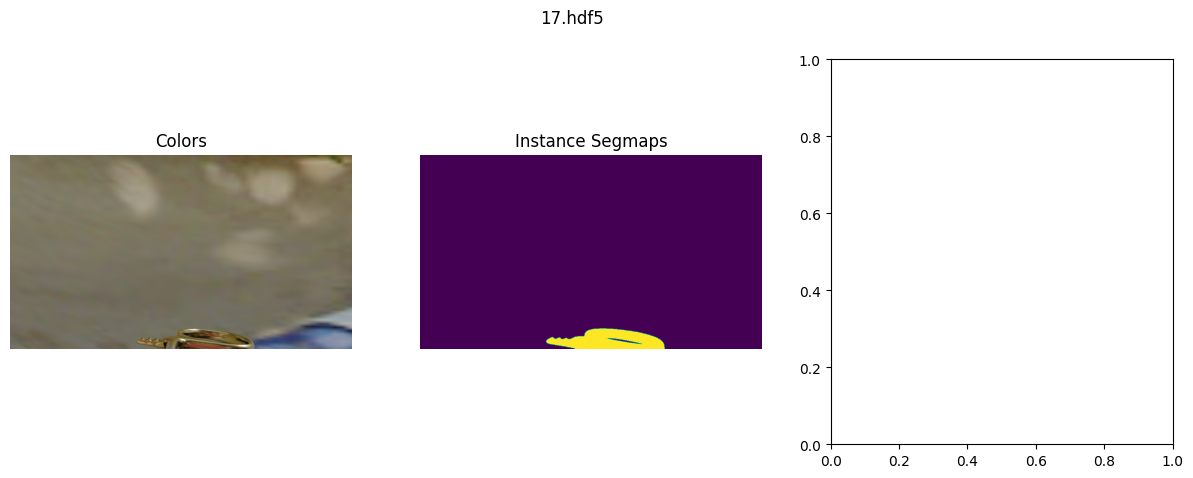

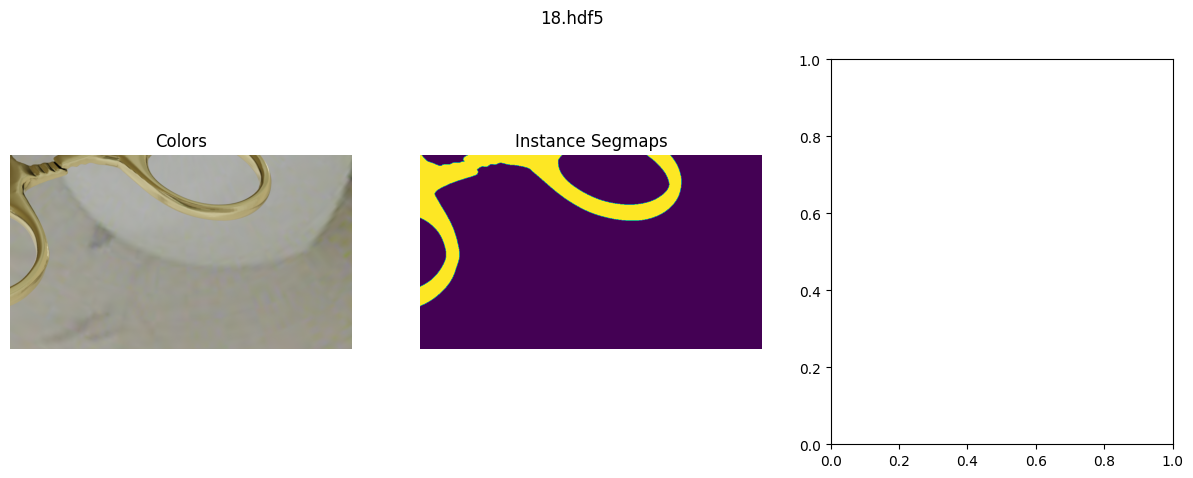

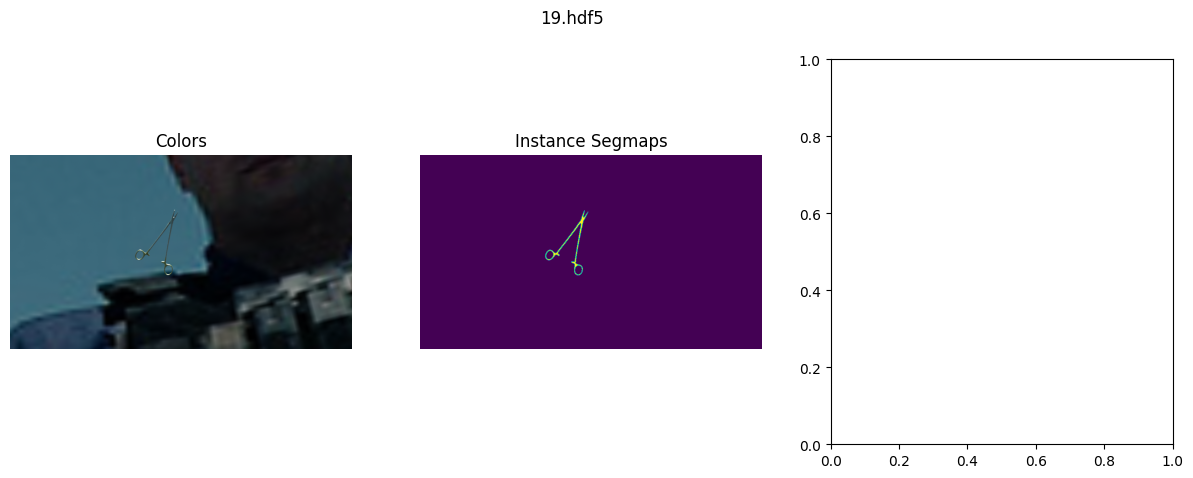

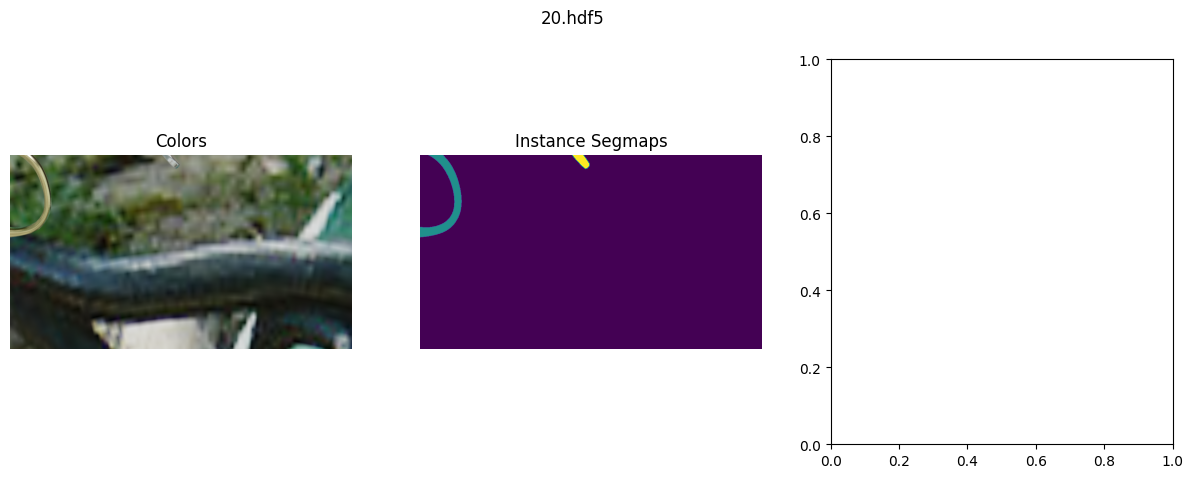

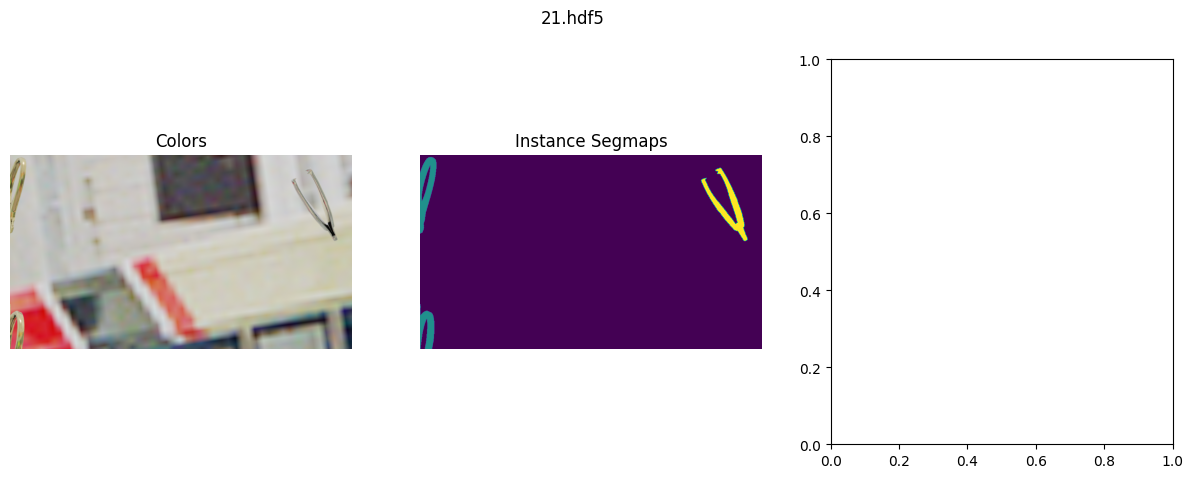

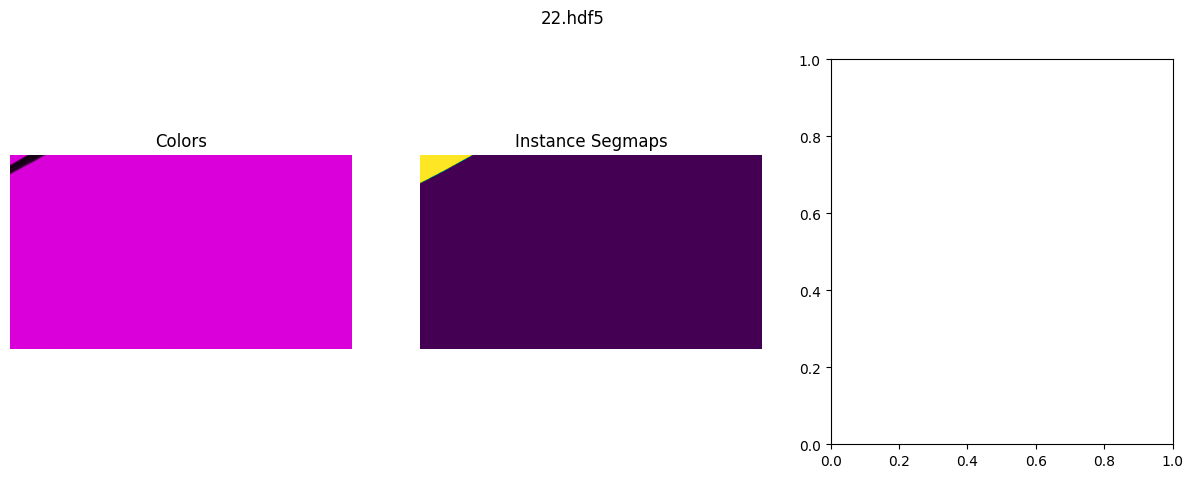

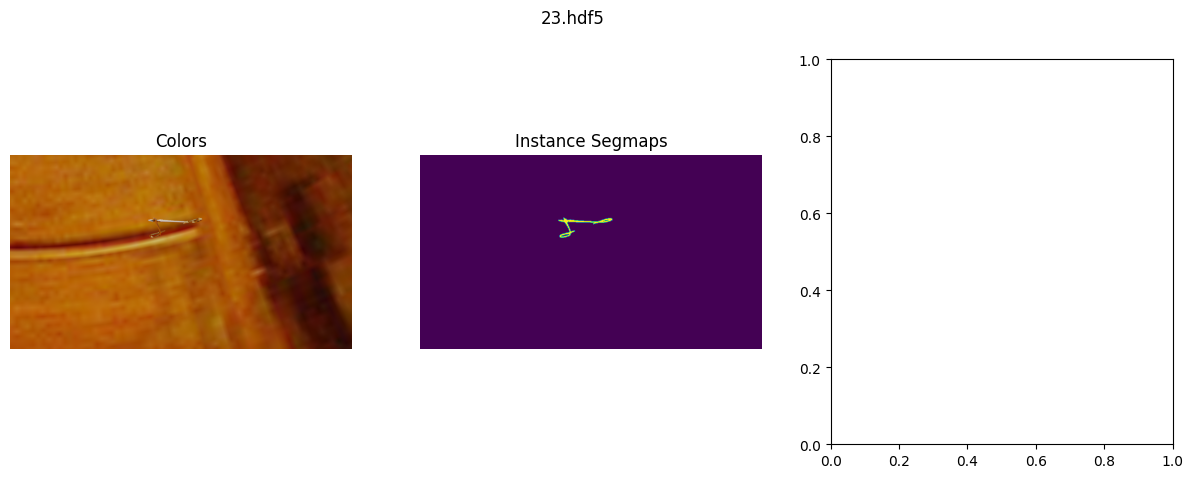

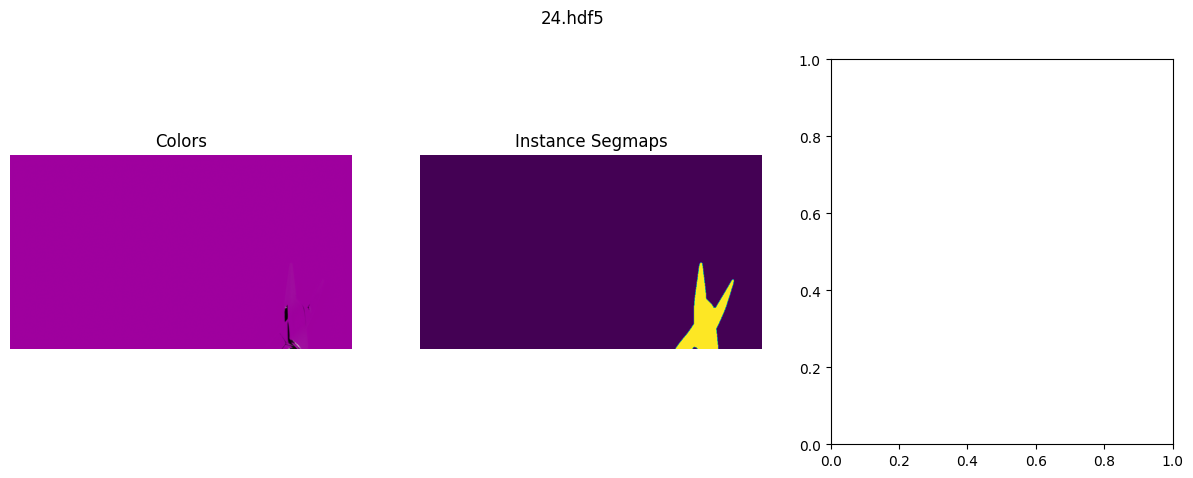

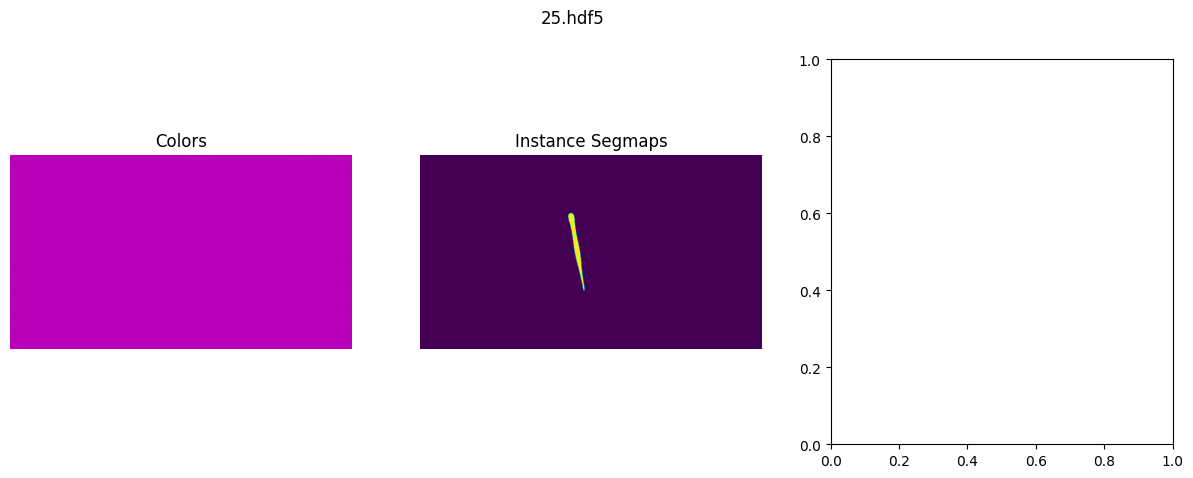

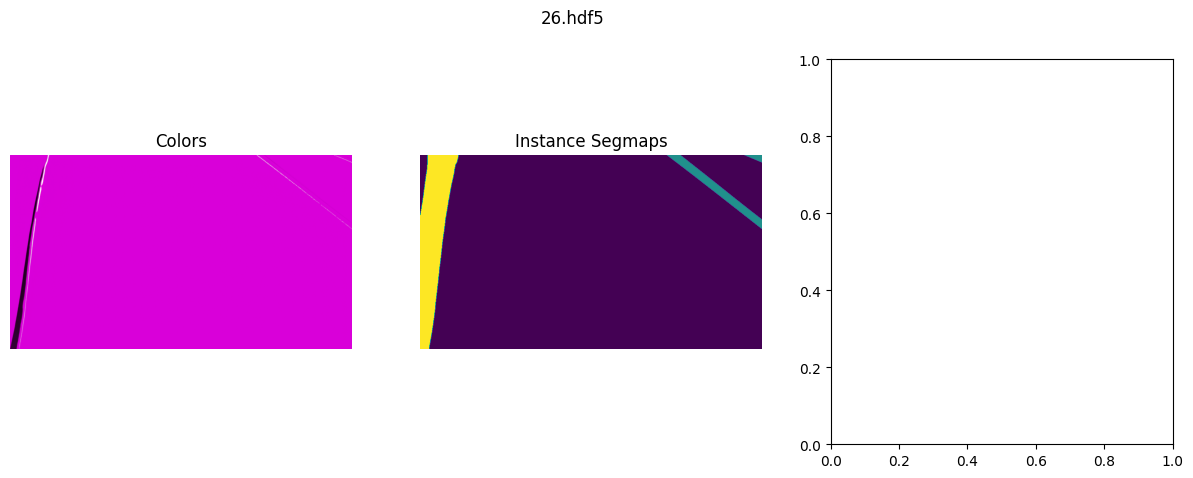

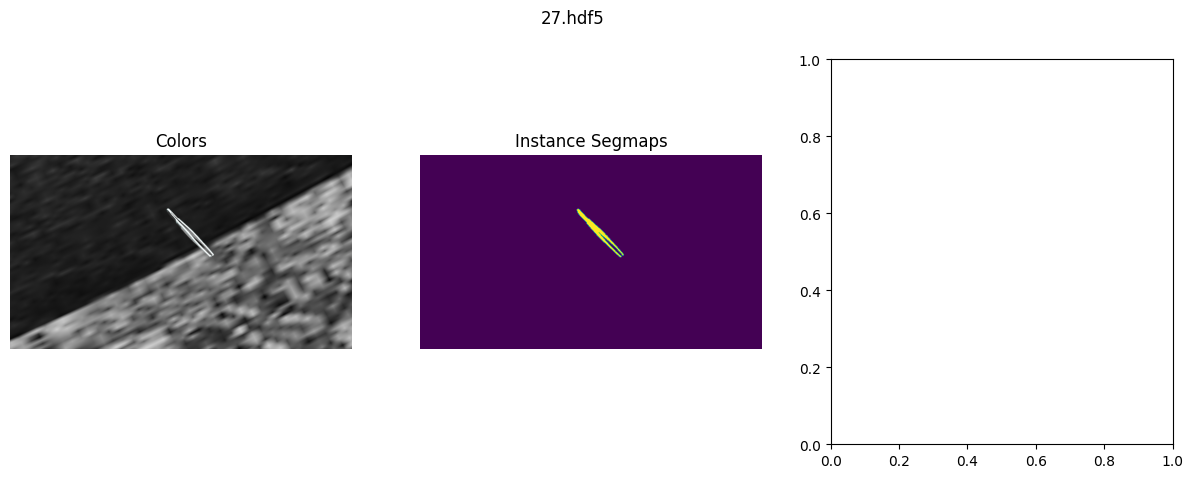

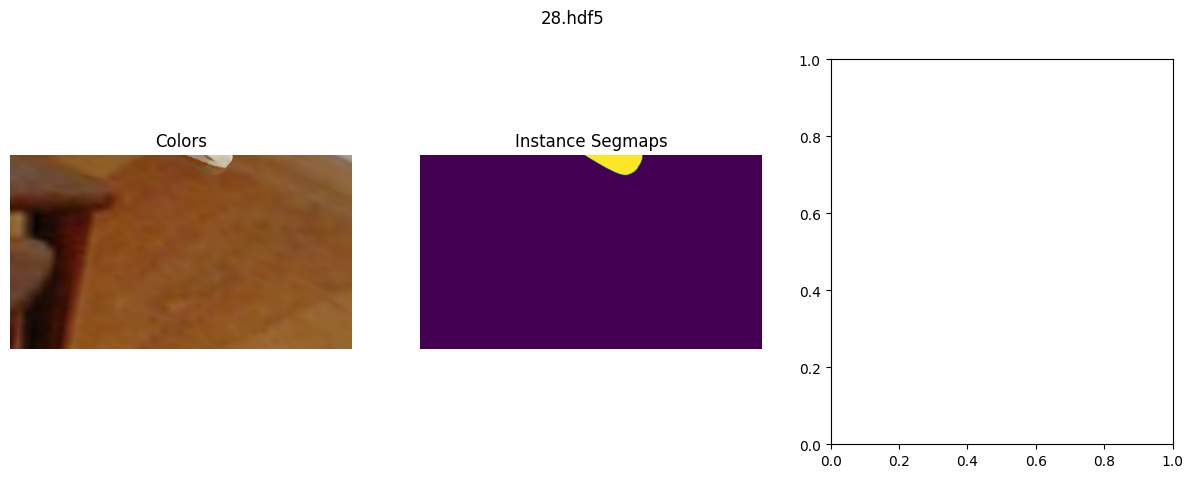

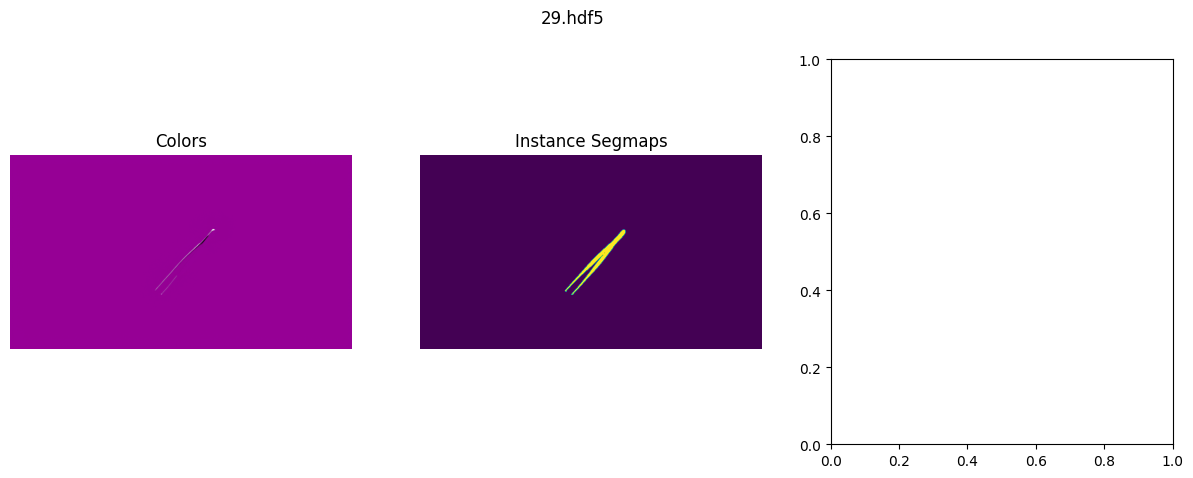

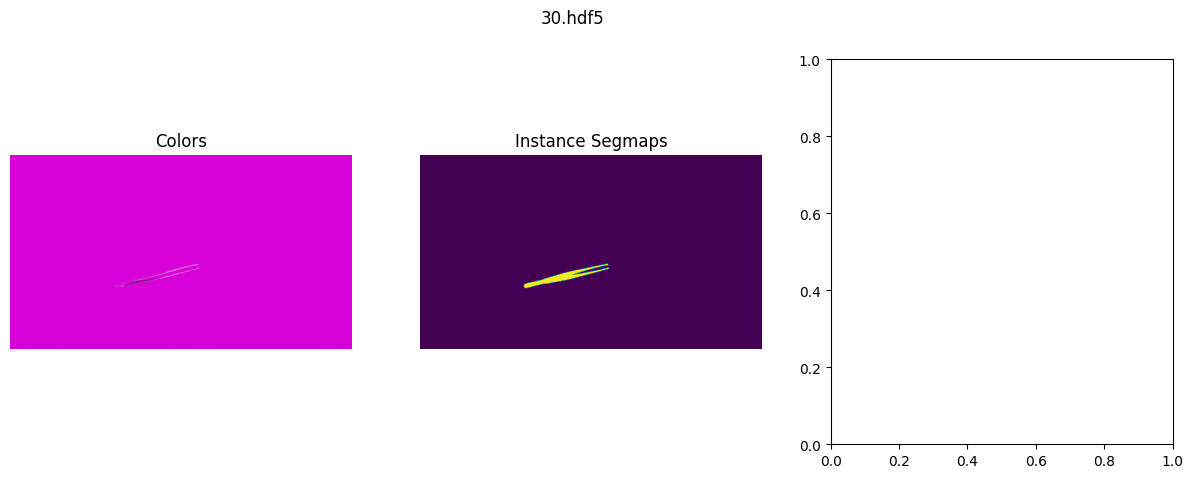

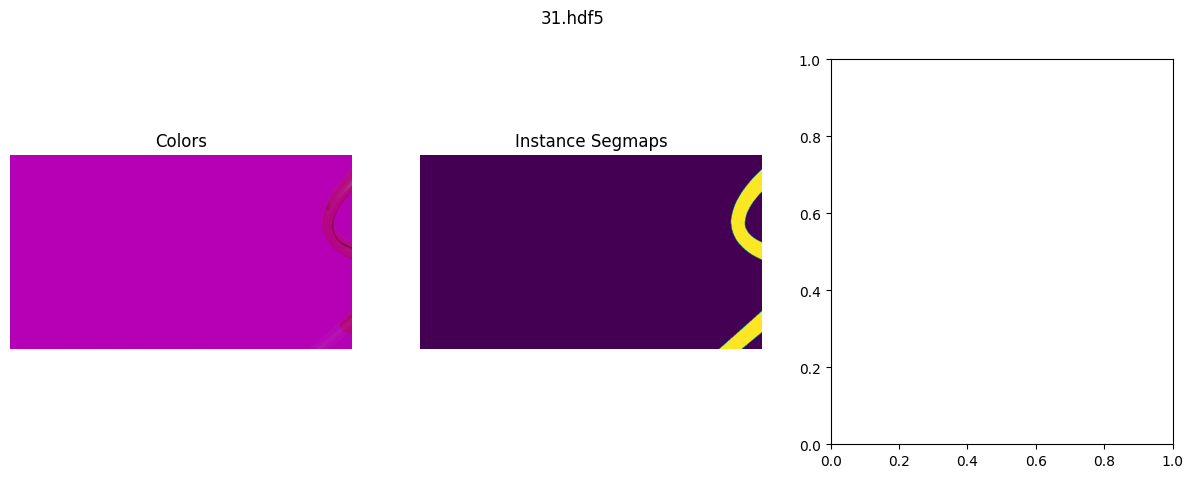

In [14]:
""" Option 3 - Plot images using matplotlib """

def plot_hdf5(file_name):
    file_path = images_dir + file_name
    # Load the HDF5 file
    with h5py.File(file_path, 'r') as file:
        colors = file['colors'][:]
        # depth = file['depth'][:]
        # normals = file['normals'][:]
        segmaps = file['instance_segmaps'][:]

    # # Replace NaN values in normals with zeros (or any suitable value)
    # normals = np.nan_to_num(normals)

    # Plot the images side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(file_name)

    # Display the color image
    axes[0].imshow(colors)
    axes[0].set_title("Colors")
    axes[0].axis("off")

    # # Display the depth image with a yellow-green colormap (viridis)
    # depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())
    # axes[1].imshow(depth_normalized, cmap='viridis')
    # axes[1].set_title("Depth")
    # axes[1].axis("off")

    # # Display the normals image
    # # Normalize each channel independently to [0, 1]
    # normals_min = normals.min(axis=(0, 1), keepdims=True)
    # normals_max = normals.max(axis=(0, 1), keepdims=True)

    # # Check if min and max are the same
    # if np.all(normals_max == normals_min):
    #     normals_normalized = np.ones(normals.shape) * 0.5  # Set a constant value for normalization
    # else:
    #     normals_normalized = (normals - normals_min) / (normals_max - normals_min)

    # # Clip to ensure values are within [0, 1]
    # normals_normalized = np.clip(normals_normalized, 0, 1)

    # axes[2].imshow(normals_normalized)
    # axes[2].set_title("Normals")
    # axes[2].axis("off")

    # Display the segmaps image
    axes[1].imshow(segmaps)
    axes[1].set_title("Instance Segmaps")
    axes[1].axis("off")

    plt.show()


for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    plot_hdf5(image)

./output/hdf5_format/0.hdf5: 
Keys: 'category_id_segmaps': (544, 960), 'colors': (544, 960, 3), 'instance_segmaps': (544, 960)


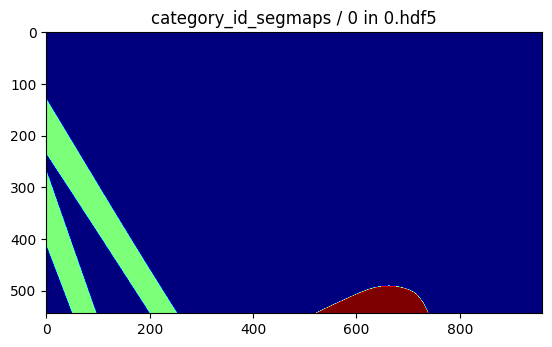

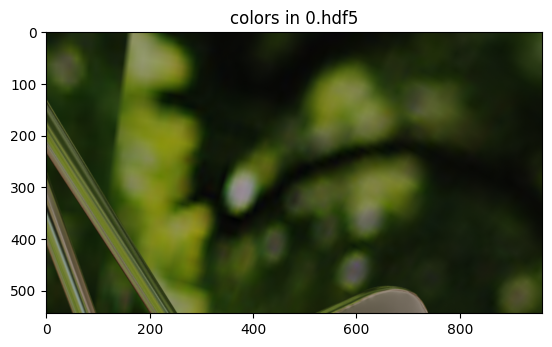

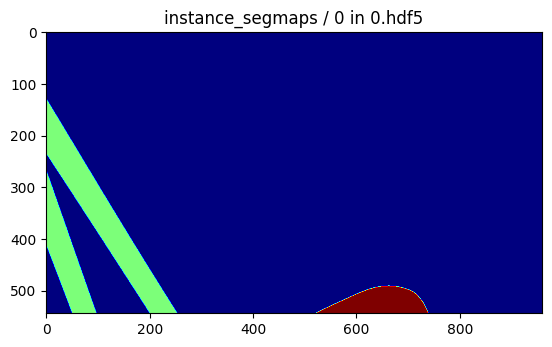

./output/hdf5_format/1.hdf5: 
Keys: 'category_id_segmaps': (544, 960), 'colors': (544, 960, 3), 'instance_segmaps': (544, 960)


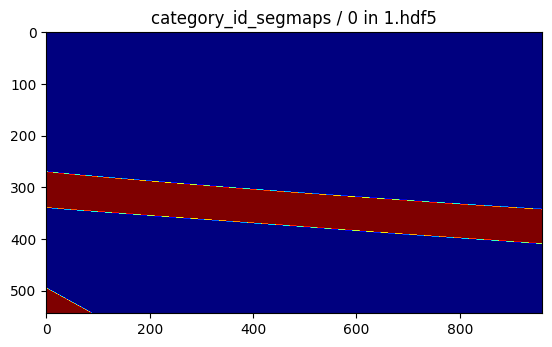

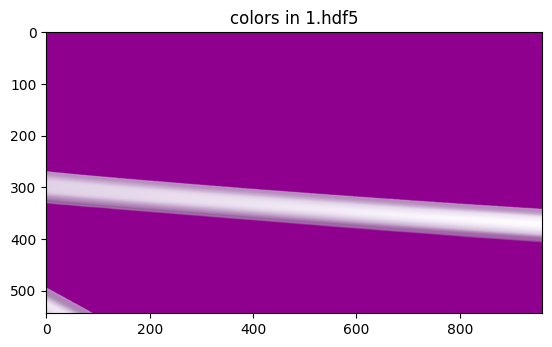

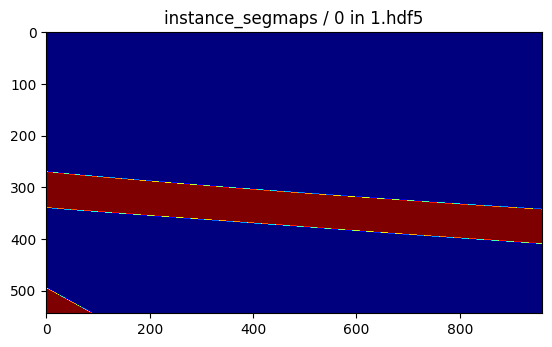

./output/hdf5_format/2.hdf5: 
Keys: 'category_id_segmaps': (544, 960), 'colors': (544, 960, 3), 'instance_segmaps': (544, 960)


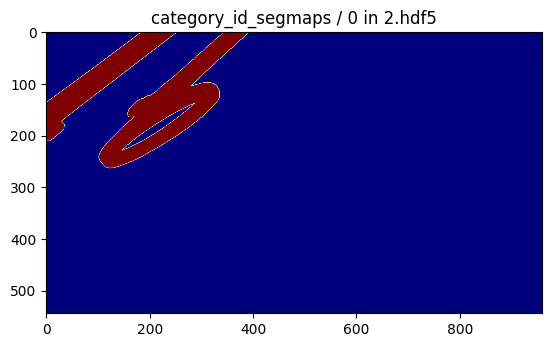

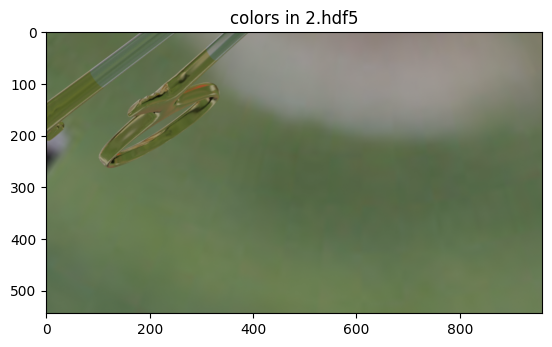

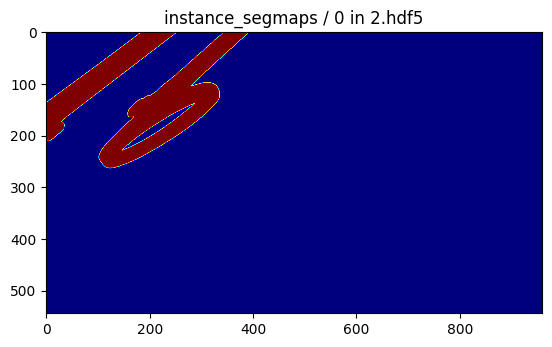

./output/hdf5_format/3.hdf5: 
Keys: 'category_id_segmaps': (544, 960), 'colors': (544, 960, 3), 'instance_segmaps': (544, 960)


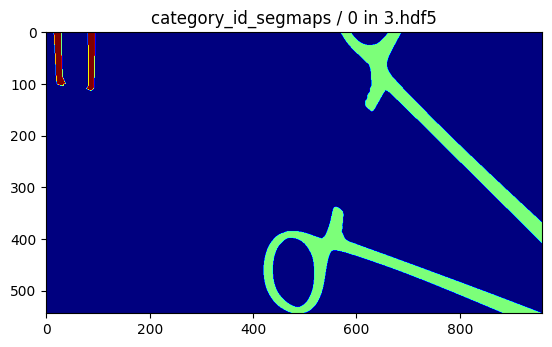

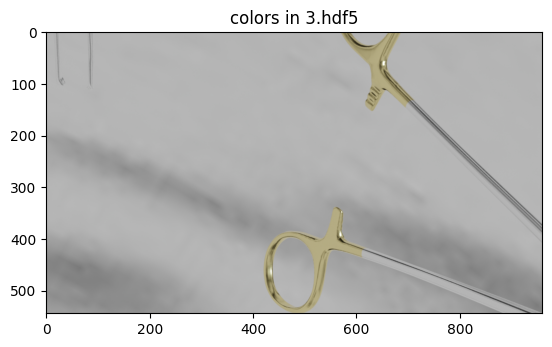

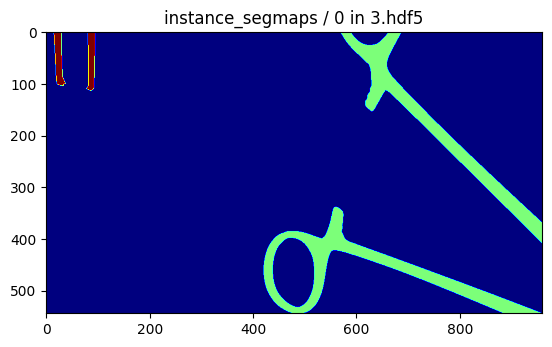

In [16]:
""" The real content of the hdf5 files """

# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "./output/hdf5_format/0.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/hdf5_format/1.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/hdf5_format/2.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/hdf5_format/3.hdf5"

In [20]:
from PIL import Image
import numpy as np
import matplotlib.cm as cm


for i in range(len(os.listdir(images_dir))):
    file = str(i) + ".hdf5"
    file_path = os.path.join(images_dir, file)
    jpg_format_dir = os.path.join("./output/", "jpg_format/")
    os.makedirs(jpg_format_dir, exist_ok=True)
    colors_dir = os.path.join(jpg_format_dir, str(i) + "_color.jpg")
    segmaps_dir = os.path.join(jpg_format_dir, str(i) + "_segmaps.jpg")
    with h5py.File(file_path, 'r') as file:
        colors = file['colors'][:]
        color_img = Image.fromarray(colors, 'RGB')
        color_img.save(colors_dir, "JPEG")
        segmaps = file['instance_segmaps'][:]

        # Normalize or map to a color range for visibility
        segmaps_normalized = (segmaps - segmaps.min()) / (segmaps.max() - segmaps.min())
        segmaps_colormap = (cm.viridis(segmaps_normalized)[:, :, :3] * 255).astype(np.uint8)
        
        segmaps_img = Image.fromarray(segmaps_colormap)
        segmaps_img.save(segmaps_dir, "JPEG")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './output/hdf5_format/32.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)